In [2]:
# import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###  The data consists of monthly beer sales from the year January, 1992 to Novemeber, 2018

In [3]:
data = pd.read_csv("BeerWineLiquor.csv")# parse_dates+ True makes sure that there's a dat column too in time series data and this is not 
data.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [4]:
data.dtypes

date    object
beer     int64
dtype: object

In [5]:
data.shape

(324, 2)

In [6]:
data.isnull().sum()

date    0
beer    0
dtype: int64

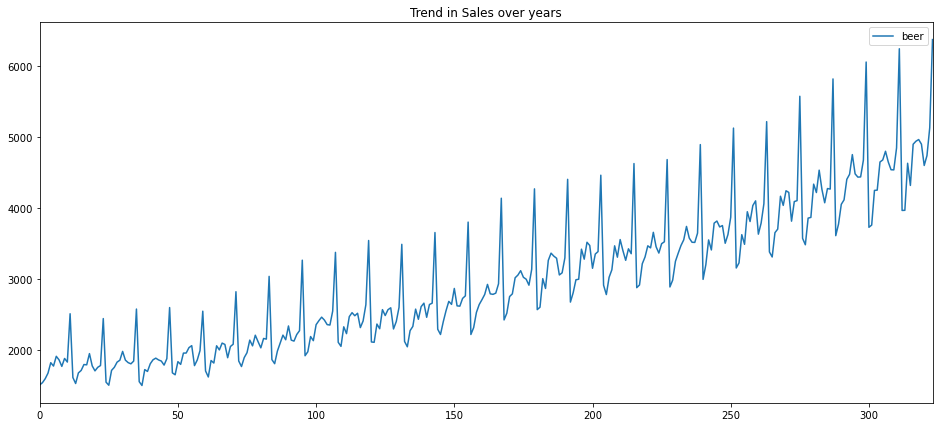

In [7]:
# Plotting graph for sales
data.plot(figsize=(16,7))
plt.title("Trend in Sales over years")
plt.show()

In [8]:
Sales = data["beer"]
Sales

0      1509
1      1541
2      1597
3      1675
4      1822
       ... 
319    4898
320    4598
321    4737
322    5130
323    6370
Name: beer, Length: 324, dtype: int64

In [9]:
len(Sales)

324

In [10]:
train=Sales.iloc[:312].values.reshape(-1,1)
test=Sales.iloc[312:].values.reshape(-1,1)
# leaving last 12 months to test the data

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()

In [12]:
sc.fit(train)
scaled_train = sc.transform(train)
scaled_test = sc.transform(test)
# Please note that we only fit the training data and we transform both train and test

In [13]:
scaled_test[:10]

array([[0.51983122],
       [0.52025316],
       [0.65991561],
       [0.59409283],
       [0.7164557 ],
       [0.72531646],
       [0.73037975],
       [0.71666667],
       [0.65337553],
       [0.68270042]])

In [14]:
#!pip install tensorflow==2.1
#!pip install keras==2.3.1

In [15]:
import keras
import tensorflow

Using TensorFlow backend.


In [16]:
scaled_train.shape

(312, 1)

In [17]:
scaled_train=scaled_train.reshape(scaled_train.shape[0])

In [18]:
scaled_train.shape # this is to make sure the generator generates shape of type - (1,12)

(312,)

In [19]:
# now, we have to create batches in such a way that we give it 12 months at a time and it predicts the 13th month and so on
# for this, we have TimeSeriesGenerator
from keras.preprocessing.sequence import TimeseriesGenerator
# defining the generator
n_input= 12 # we want to give 12 months at a time
n_features=1 # Since we have only one time series features it's 1. In case of multiple time series features, it'd be more
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [20]:
X,y=generator[0]
print("X is {}".format(X.flatten()))
print("y is {}".format(y))


X is [0.00168776 0.00843882 0.02025316 0.03670886 0.06772152 0.05780591
 0.08670886 0.07616034 0.05675105 0.08037975 0.06962025 0.21308017]
y is [0.02383966]


In [21]:
X.shape

(1, 12)

In [22]:
# the above shape should work fine with MLP

In [25]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               1300      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 1,401
Trainable params: 1,401
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(generator,epochs=50)

Epoch 1/50
300/300 [==============================] - 0s 977us/step - loss: 0.0087
Epoch 2/50
300/300 [==============================] - 0s 884us/step - loss: 0.0017
Epoch 3/50
300/300 [==============================] - 0s 900us/step - loss: 7.5866e-04
Epoch 4/50
300/300 [==============================] - 0s 951us/step - loss: 5.5415e-04
Epoch 5/50
300/300 [==============================] - 0s 954us/step - loss: 6.5063e-04
Epoch 6/50
300/300 [==============================] - 0s 951us/step - loss: 8.9096e-04
Epoch 7/50
300/300 [==============================] - 0s 1ms/step - loss: 8.5462e-04
Epoch 8/50
300/300 [==============================] - 0s 925us/step - loss: 7.1535e-04
Epoch 9/50
300/300 [==============================] - 0s 1ms/step - loss: 6.4740e-04
Epoch 10/50
300/300 [==============================] - 0s 1ms/step - loss: 6.6071e-04
Epoch 11/50
300/300 [==============================] - 0s 985us/step - loss: 7.4719e-04
Epoch 12/50
300/300 [==============================] - 

In [28]:
# Continue from here - plot loss and then predict values

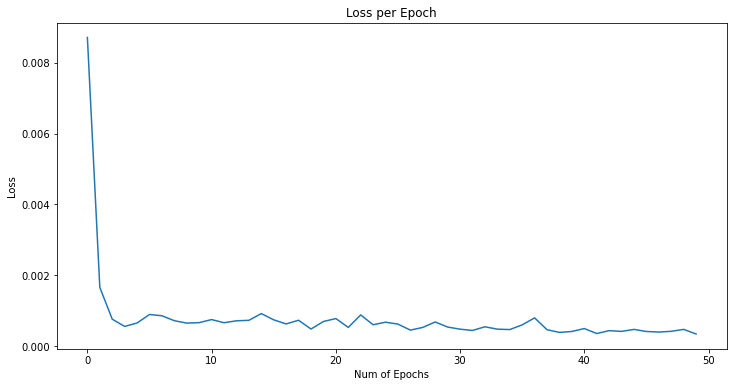

In [29]:
# we can plot loss per epoch too
loss_per_epoch = model.history.history['loss']
fig = plt.figure(1, figsize=(12,6))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.title('Loss per Epoch')
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.show()

In [30]:
X.shape

(1, 12)

In [31]:
batch_for_prediction = scaled_train[-12:]
current_batch = batch_for_prediction.reshape(1,n_input)
current_pred=model.predict(current_batch)[0]

In [32]:
current_pred

array([0.4890458], dtype=float32)

In [33]:
scaled_test[0]

array([0.51983122])

In [38]:
# So the shape of input is 1 row, 12 columns and last '1' depicts 1 feature
#Now, we have to predict the first value of test set so for that we'll pass last 12 rows of training data

test_predictions=[]
batch_for_prediction = scaled_train[-12:]
current_batch = batch_for_prediction.reshape(1,n_input) # first batch for prediction

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:],[current_pred],axis=1)
    


In [39]:
test_predictions

[array([0.4890458], dtype=float32),
 array([0.5102953], dtype=float32),
 array([0.5900839], dtype=float32),
 array([0.5931955], dtype=float32),
 array([0.68712103], dtype=float32),
 array([0.6970819], dtype=float32),
 array([0.7222058], dtype=float32),
 array([0.68860424], dtype=float32),
 array([0.64484066], dtype=float32),
 array([0.6566917], dtype=float32),
 array([0.71972036], dtype=float32),
 array([1.0490936], dtype=float32)]

In [40]:
scaled_test

array([[0.51983122],
       [0.52025316],
       [0.65991561],
       [0.59409283],
       [0.7164557 ],
       [0.72531646],
       [0.73037975],
       [0.71666667],
       [0.65337553],
       [0.68270042],
       [0.76561181],
       [1.02721519]])

In [52]:
true_predictions=sc.inverse_transform(test_predictions)
true_predictions=true_predictions.reshape(true_predictions.shape[0])
true_predictions.shape[0]
true_predictions

array([3819.07708621, 3919.79958868, 4297.99767232, 4312.74666047,
       4757.95369959, 4805.16831732, 4924.2555759 , 4764.98407698,
       4557.54471755, 4613.71851778, 4912.47452354, 6473.70368338])

In [54]:
test=test.reshape(test.shape[0])
test

array([3965, 3967, 4629, 4317, 4897, 4939, 4963, 4898, 4598, 4737, 5130,
       6370])

In [55]:
## comparing actual versus predicted
comparison_df=pd.DataFrame(list(zip(test,true_predictions)),columns=["Actual Sales","Predicted Values"])
comparison_df

,Actual Sales,Predicted Values
0,3965,3819.077086
1,3967,3919.799589
2,4629,4297.997672
3,4317,4312.746660
4,4897,4757.953700
5,4939,4805.168317
6,4963,4924.255576
7,4898,4764.984077
8,4598,4557.544718
9,4737,4613.718518


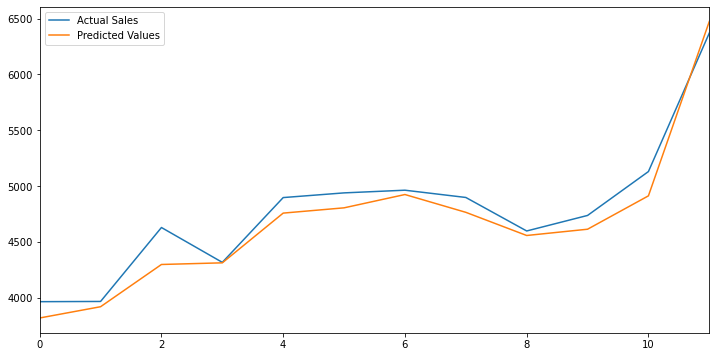

In [56]:
comparison_df.plot(figsize=(12,6))
figsize=(12,6)

In [57]:
# calculating rmse score
from sklearn.metrics import mean_squared_error
from math import sqrt
print(sqrt(mean_squared_error(comparison_df["Actual Sales"],comparison_df["Predicted Values"])))

148.4497409728003
